In [762]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [763]:
paris = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Paris (December 2015).csv',
                   encoding='utf8')

In [764]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41761 entries, 0 to 41760
Data columns (total 16 columns):
Unnamed: 0              41761 non-null int64
room_id                 41761 non-null int64
host_id                 41489 non-null float64
room_type               41489 non-null object
borough                 0 non-null float64
neighborhood            41761 non-null object
reviews                 41761 non-null int64
overall_satisfaction    30117 non-null float64
accommodates            37792 non-null float64
bedrooms                41268 non-null float64
bathrooms               39064 non-null float64
price                   41761 non-null float64
minstay                 40917 non-null float64
latitude                41761 non-null float64
longitude               41761 non-null float64
collected               41761 non-null object
dtypes: float64(10), int64(3), object(3)
memory usage: 5.1+ MB


In [765]:
paris = paris.drop('borough', axis=1)

In [766]:
paris.neighborhood.unique()

array([u'Notre-Dame-des-Champs', u'Sorbonne', u'Plaisance',
       u'Folie-M\ufffdricourt', u'Arts-et-Metiers', u'Grenelle',
       u'Notre-Dame', u'Saint-Georges', u'Saint-Merri',
       u'Faubourg-Montmartre', u'Saint-Avoye', u'Sainte-Marguerite',
       u'P\ufffdre-Lachaise', u'Villette', u'Saint-Ambroise',
       u'Clignancourt', u'Europe', u'Ternes', u'Enfants-Rouges',
       u'Saint-Victor', u'H\ufffdpital-Saint-Louis', u'Rochechouart',
       u'Necker', u'Gare', u'Roquette', u'Salp\ufffdtri\ufffdre',
       u'Grandes-Carri\ufffdres', u'Porte-Saint-Martin', u'Combat',
       u'Maison-Blanche', u'Saint-Gervais', u'Bonne-Nouvelle',
       u'Belleville', u'Pont-de-Flandre', u'Madeleine', u'Halles',
       u'Goutte-dOr', u'St-Germain-lAuxerrois', u'Val-de-Grace',
       u'Invalides', u'Jardin-des-Plantes', u'Bel-Air', u'Charonne',
       u'Am\ufffdrique', u'Batignolles', u'Odeon', u'Epinettes',
       u'Porte-Dauphine', u'Saint-Vincent-de-Paul', u'Gros-Caillou',
       u'Quinze-Vingt

In [767]:
paris.neighborhood.replace(u'Folie-M\ufffdricourt',u'Folie-Mericourt',inplace=True)
paris.neighborhood.replace(u'P\ufffdre-Lachaise',u'Pere-Lachaise',inplace=True)
paris.neighborhood.replace(u'H\ufffdpital-Saint-Louis',u'Hopital-Saint-Louis',inplace=True)
paris.neighborhood.replace(u'Salp\ufffdtri\ufffdre',u'Salpetriere',inplace=True)
paris.neighborhood.replace(u'Grandes-Carri\ufffdres',u'Grandes-Carrieres',inplace=True)
paris.neighborhood.replace(u'Am\ufffdrique',u'Amerique',inplace=True)
paris.neighborhood.replace(u'Saint-Germain-des-Pr\ufffds',u'Saint-Germain-des-Pres',inplace=True)
paris.neighborhood.replace(u'Chauss\ufffde-dAntin',u'Chaussee-dAntin',inplace=True)
paris.neighborhood.replace(u'Champs-Elys\ufffdes',u'Champs-Elysees',inplace=True)
paris.neighborhood.replace(u'Place-Vend\ufffdme',u'Place-Vendome',inplace=True)

In [768]:
paris.head()

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,2525,2771.0,Entire home/apt,Notre-Dame-des-Champs,17,4.5,1.0,0.0,1.0,76.0,6.0,48.849054,2.331454,2016-01-01 21:23:11.210689
1,1,2623,2883.0,Private room,Sorbonne,61,4.0,2.0,1.0,1.0,122.0,1.0,48.852169,2.347332,2016-01-01 15:23:42.226951
2,2,3109,3631.0,Entire home/apt,Plaisance,0,NaN,2.0,1.0,1.0,95.0,2.0,48.833494,2.318518,2016-01-01 16:01:35.286433
3,3,4886,6792.0,Entire home/apt,Folie-Mericourt,9,4.5,2.0,0.0,1.0,100.0,3.0,48.865283,2.371150,2016-01-01 05:34:51.122949
4,4,4890,6792.0,Entire home/apt,Arts-et-Metiers,10,4.5,4.0,1.0,1.0,202.0,3.0,48.864090,2.356515,2015-12-31 07:57:00.485928


In [769]:
paris = paris[paris['host_id'].notnull()]

In [770]:
paris.room_type.value_counts()

Entire home/apt    35500
Private room        5549
Shared room          440
Name: room_type, dtype: int64

In [771]:
#paris.neighborhood.value_counts()

In [772]:
paris.shape

(41489, 15)

In [773]:
import numpy as np

In [774]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(paris.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [775]:
df1 = df1.reset_index(level = 0)

In [776]:
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [777]:
df1

,neighborhood,reviews,host_id,price
14,Clignancourt,27162,1944,97.488169
27,Grandes-Carrieres,20941,1372,106.479592
60,Roquette,15270,1107,101.268293
67,Saint-Lambert,7986,1013,94.446199
28,Grenelle,11260,970,120.843299
23,Folie-Mericourt,12720,824,98.950243
4,Auteuil,5000,776,117.974227
42,Necker,7674,770,107.396104
61,Saint-Ambroise,10899,766,99.353786
9,Bonne-Nouvelle,13482,765,127.811765


In [778]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [779]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

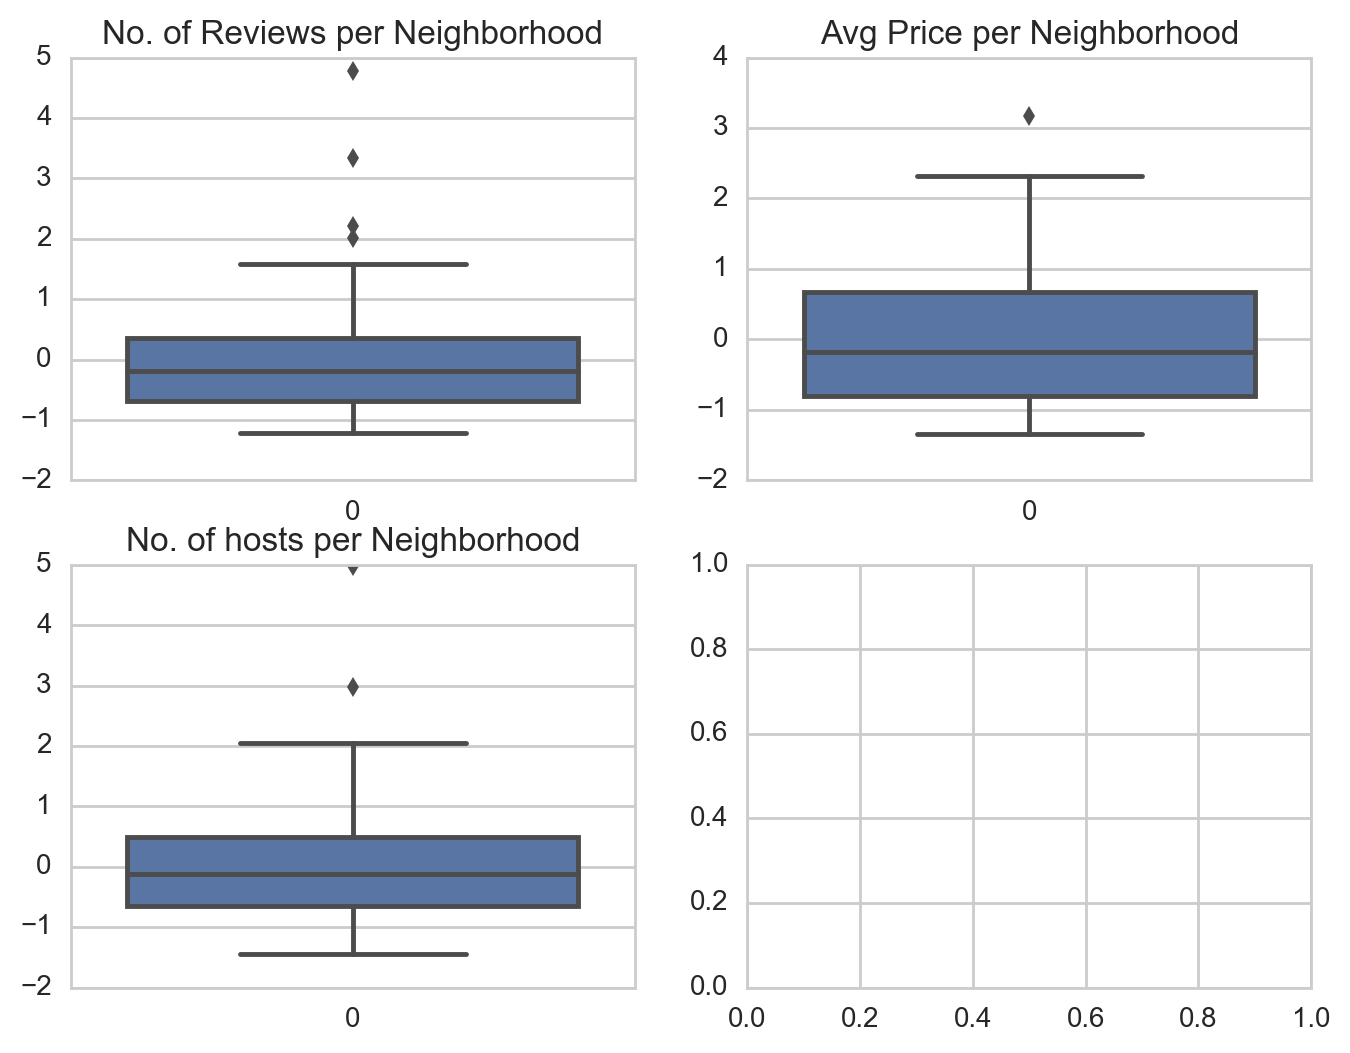

In [780]:
fig, axis_array = plt.subplots(2,2, figsize=(8,6)) # figure with one row and 2 columns within fig. Subplots
axis1 = axis_array[0][0]
axis2 = axis_array[0][1]
axis3 = axis_array[1][0]

axis1 = sns.boxplot(data = df1.reviews, ax=axis1)
axis2 = sns.boxplot(data = df1.price, ax=axis2)
axis3 = sns.boxplot(data = df1.host_id, ax=axis3)


#axis1.set_xlim(low-1, high+1)
#axis1.set_xlabel('Outcome', fontsize=16)
#axis1.set_ylabel('Number of Reviews ', fontsize=8)
#axis1.vlines(x, 0, dist.pmf(x), colors='darkred', lw=8, alpha=0.8) # plots vertical lines
#axis1.set_ylim(0, max(dist.pmf(x))+0.03)
    

axis1.set_title('No. of Reviews per Neighborhood', fontsize=12)
axis2.set_title('Avg Price per Neighborhood', fontsize=12)
axis3.set_title('No. of hosts per Neighborhood', fontsize=12)


plt.show()

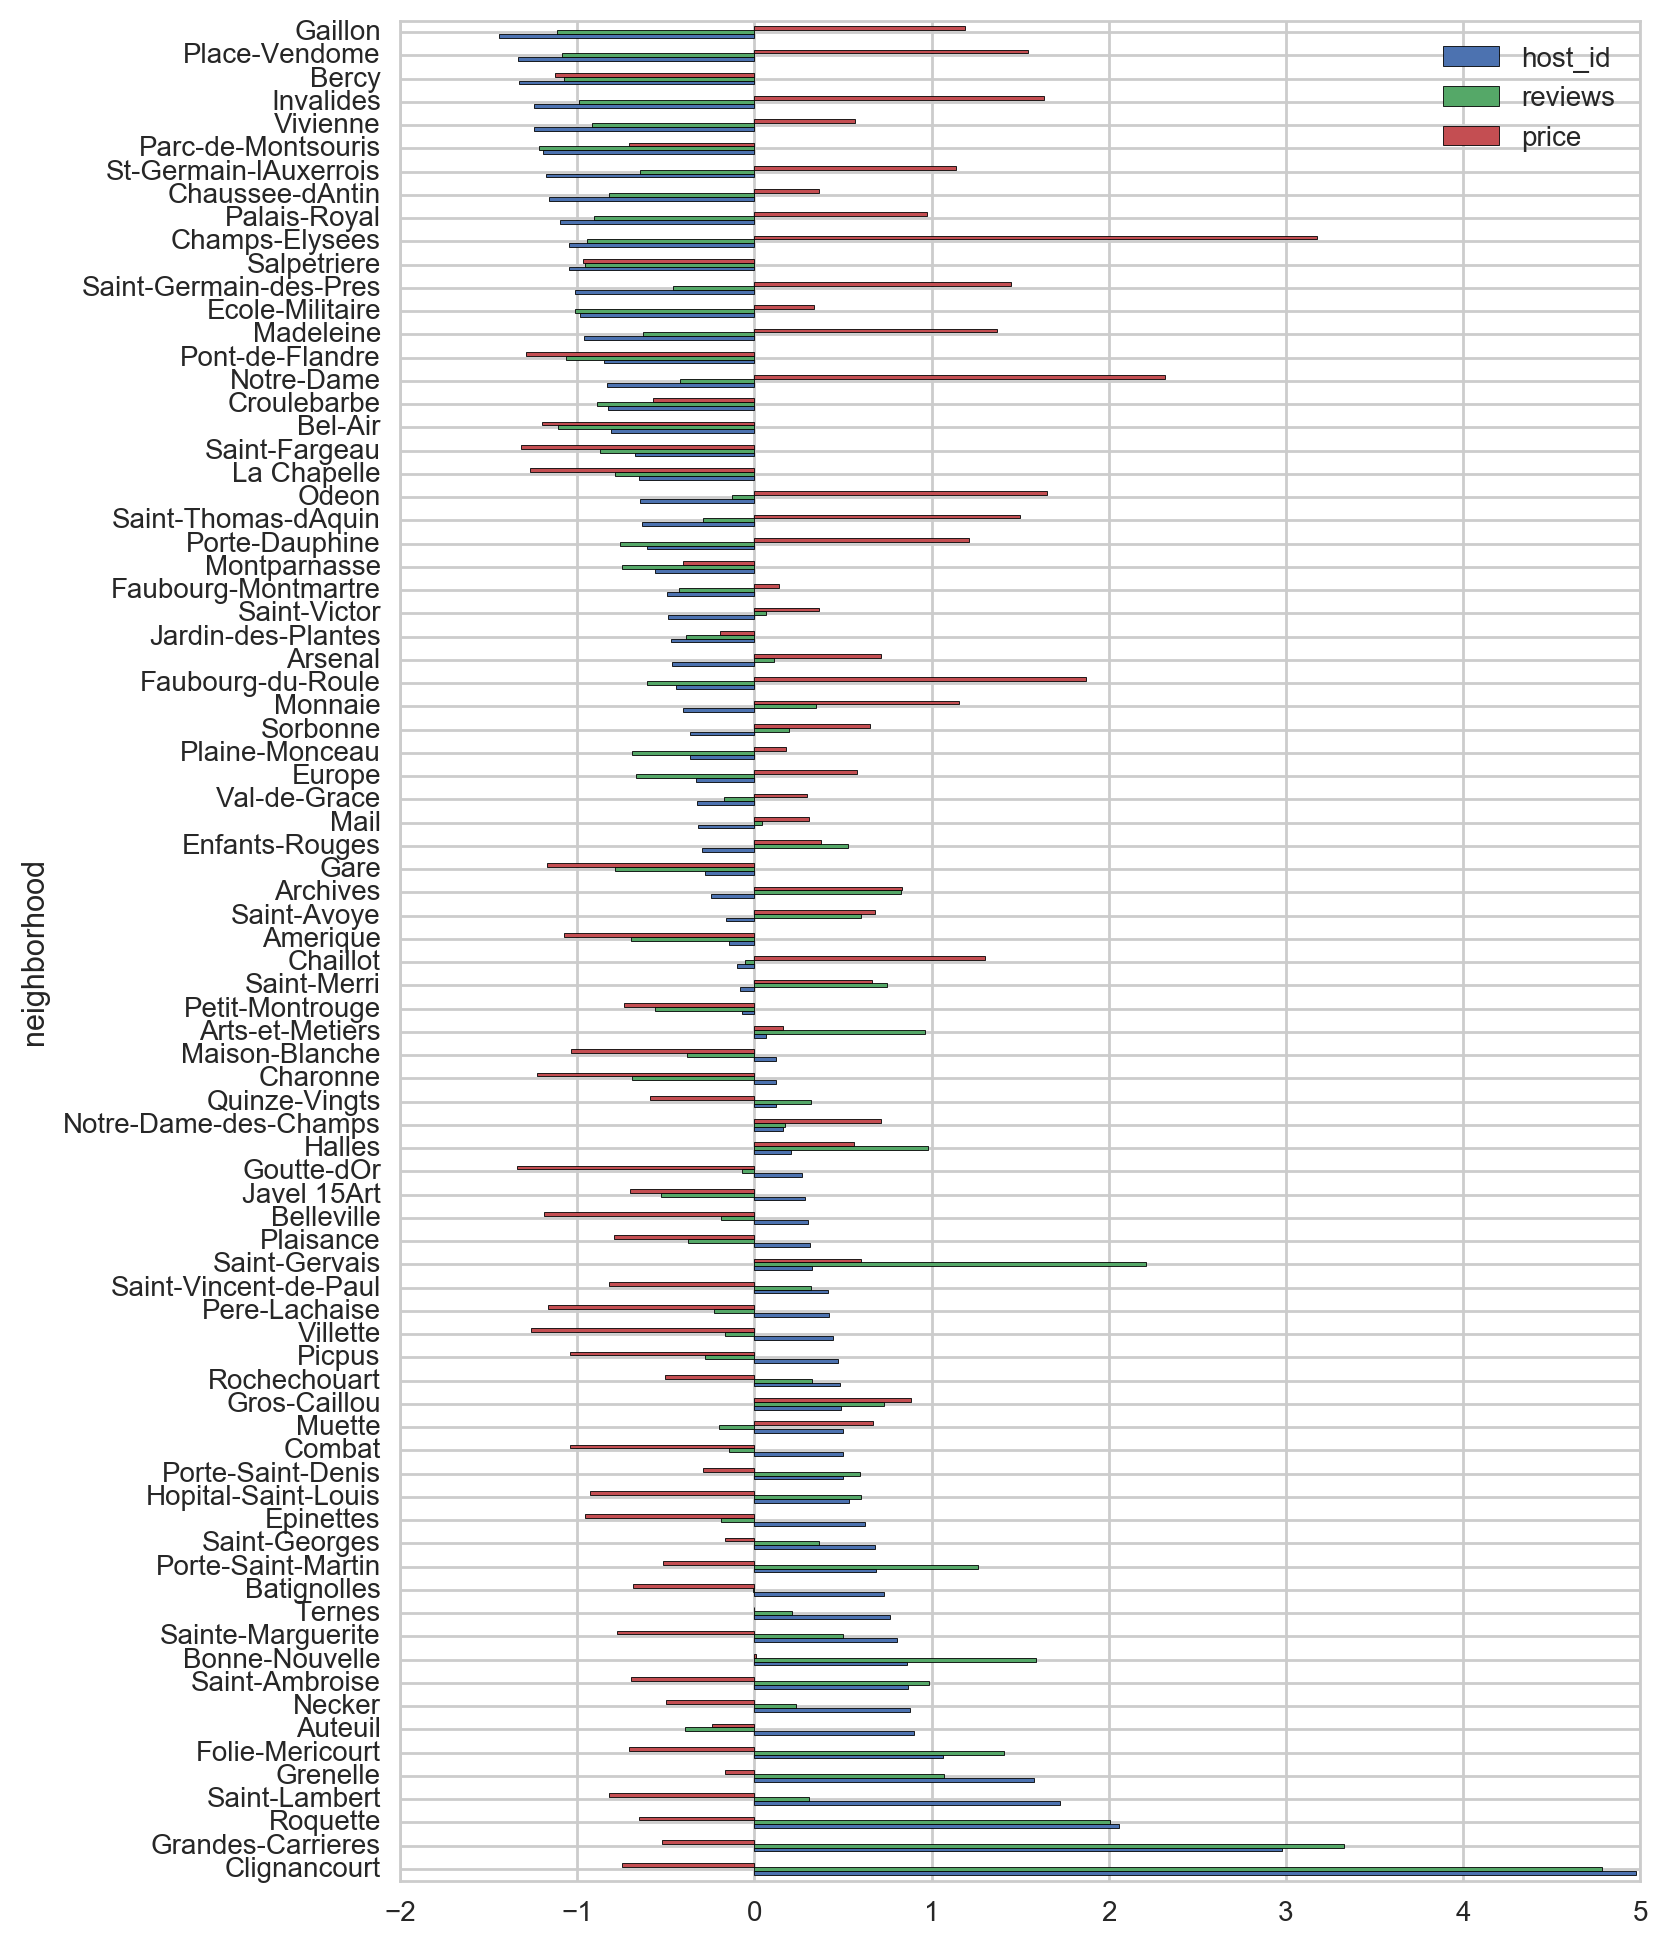

In [781]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [782]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(paris.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [783]:
df2.head()

reviews  host_id       price
neighborhood room_type                                    
Amerique     Entire home/apt     2901      363   95.019284
             Private room         669      103   51.708738
             Shared room          112       12   37.750000
Archives     Entire home/apt     9750      414  168.154589
             Private room         443       30   75.133333

In [784]:
df2.reset_index(level=0, inplace=True)

In [785]:
df2.reset_index(inplace=True)

In [786]:
df2.head()

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Amerique,2901,363,95.019284
1,Private room,Amerique,669,103,51.708738
2,Shared room,Amerique,112,12,37.750000
3,Entire home/apt,Archives,9750,414,168.154589
4,Private room,Archives,443,30,75.133333


In [787]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

In [788]:
df2.head()

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Amerique,0.179842,0.767467,0.179064
1,Private room,Amerique,-0.468545,-0.307089,-0.756067
2,Shared room,Amerique,-0.630351,-0.683184,-1.057455
3,Entire home/apt,Archives,2.169447,0.978246,1.758151
4,Private room,Archives,-0.534197,-0.608792,-0.250300


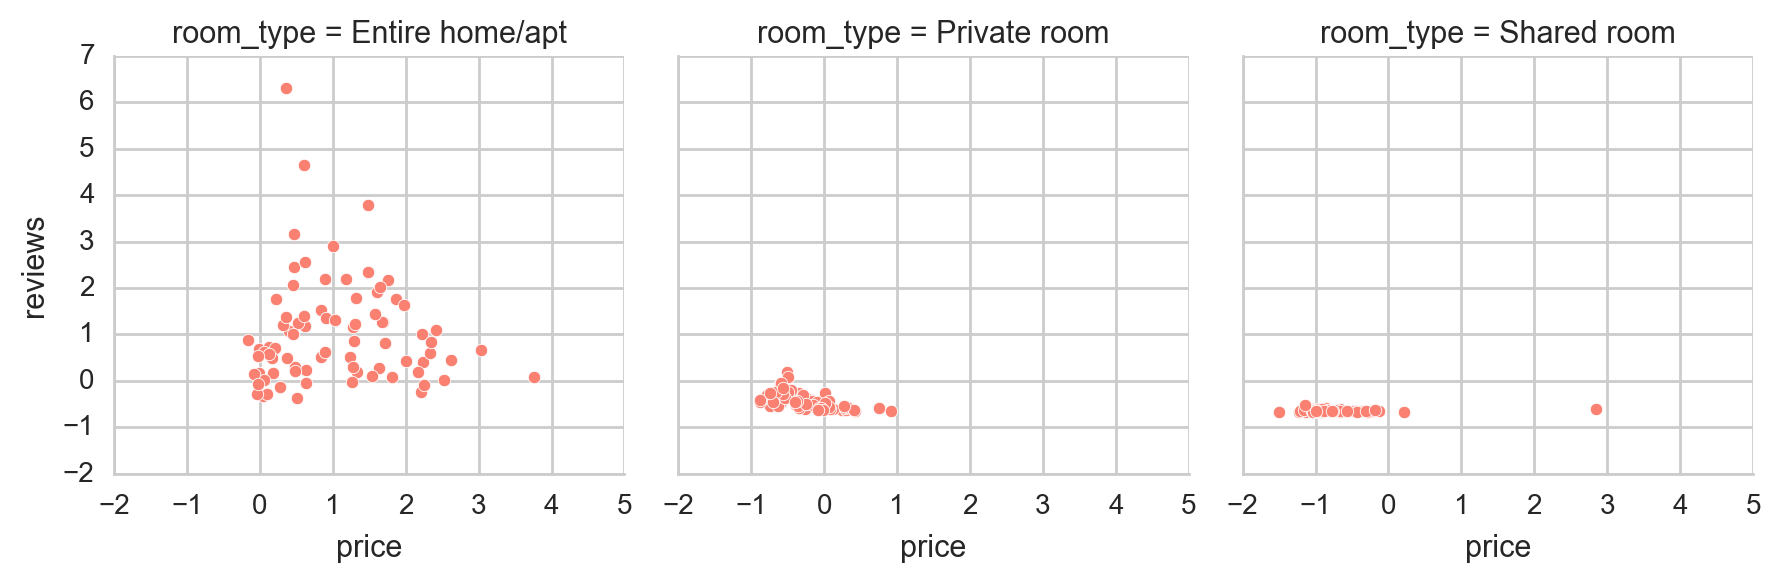

In [789]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [790]:
# fig, axis_array = plt.subplots(1,2, figsize=(12,4)) # figure with one row and 2 columns within fig. Subplots
# axis1, axis2 = axis_array[0], axis_array[1]

# axis1 = sns.boxplot(data = boston.rate_of_crime, ax=axis1)

# axis2 = sns.boxplot(data = boston.business_zone_pact, ax=axis2)

# axis1.set_xlim(low-1, high+1)
# axis1.set_xlabel('Outcome', fontsize=16)
# axis1.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
# axis1.vlines(x, 0, dist.pmf(x), colors='darkred', lw=8, alpha=0.8) # plots vertical lines
# axis1.set_ylim(0, max(dist.pmf(x))+0.03)
    
# plt.title(title+'\n', fontsize=20)
# plt.show()

# axis1.set_title('Rate of crime boxplot', fontsize=20)

# axis2.set_title('Business zone pct bloxplot', fontsize=20)

# plt.show()

In [791]:
df2_corr = df2.corr()
df2_corr

,reviews,host_id,price
reviews,1.000000,0.929686,0.550641
host_id,0.929686,1.000000,0.508552
price,0.550641,0.508552,1.000000


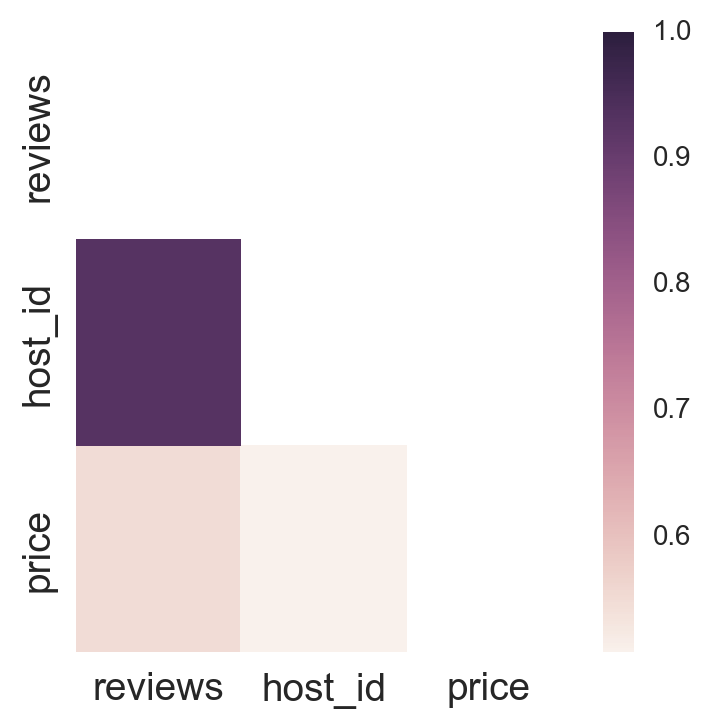

In [792]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(4,4)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df2_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [793]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(paris.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [794]:
neighborhood_data.reset_index(inplace =True)

In [977]:
neighborhood_data.head()

,neighborhood,reviews,host_id,price,longitude,latitude
0,Amerique,3682,478,84.248954,2.392708,48.880535
1,Archives,10223,448,161.102679,2.363390,48.859274
2,Arsenal,7145,386,156.284974,2.365218,48.853021
3,Arts-et-Metiers,10798,538,134.148699,2.357057,48.866212
4,Auteuil,5000,776,117.974227,2.265234,48.845785


In [796]:
# define price

def price_color(neighborhood_data, row):
    
    if neighborhood_data.ix[row, 'price'] < 100:
        return 'green'
    elif 100 < neighborhood_data.ix[row, 'price'] < 150:
        return 'orange'
    else:
        return 'red'

In [797]:
import folium

In [798]:
paris_map = folium.Map(location=[48.864716, 2.349014])

for each_row in range(neighborhood_data.shape[0]):
     paris_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [799]:
paris_map

In [800]:
#  import json

# with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/paris.geo.json") as fp:
#     geodata = json.load(fp)

In [801]:
#geodata.keys()

In [802]:
#neighborhoods = geodata['objects']['conseils-quartiers']['geometries']
#[neighborhood['properties']['name'] for neighborhood in neighborhoods]

In [803]:
#len(geodata['arcs'])

In [804]:
with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson") as fp:
    geodata = json.load(fp)

In [86]:
geodata[u'features']

NameError: name 'geodata' is not defined

In [806]:
neighborhoods = [feature['properties']['l_qu'] for feature in geodata['features']]

In [807]:
coords = [coord['geometry']['coordinates'] for coord in geodata['features']]
#coords

In [808]:
neighborhood_coords = {n: c for n, c in zip(neighborhoods, coords)}

In [809]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns=['neighborhood', 'long_lat'])

In [974]:
#neighborhood_coords.neighborhood.unique()

In [811]:
#neighborhood_coords[u'Vivienne'][0][0]

In [812]:
neighborhood_cntrd = [feature['properties']['geom_x_y'] for feature in geodata['features']]

In [813]:
#neighborhood_cntrd

In [814]:
neighborhood_center = {n: c for n, c in zip(neighborhoods, neighborhood_cntrd)}

In [815]:
neighborhood_center = pd.DataFrame(neighborhood_center.items(), columns=['neighborhood', 'long_lat'])

In [816]:
neighborhood_center['latitude'] = neighborhood_center['long_lat'].map(lambda x:x[0])

In [817]:
neighborhood_center['longitude'] = neighborhood_center['long_lat'].map(lambda x:x[1])

In [818]:
neighborhood_center.drop('long_lat', inplace=True, axis=1)

In [819]:
neighborhood_center.head(2)

,neighborhood,latitude,longitude
0,Grandes-Carrières,48.892578,2.334363
1,Champs-Elysées,48.867074,2.308652


In [820]:
neighborhood_center.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [821]:
neighborhood_center = neighborhood_center.reset_index()

In [972]:
#neighborhood_center.neighborhood.unique()

In [823]:
import Levenshtein


In [824]:
import Levenshtein

def ld_match(df1, df2):

    nbr_match = []
    nbr_notmatch = []

    for row in range(df1.shape[0]):
    
        ld = Levenshtein.ratio((df1.ix[row,'neighborhood']),(df2.ix[row,'neighborhood']))

        if ld >= 0.8:
            df2.ix[row,'neighborhood'] = df1.ix[row,'neighborhood']
            nbr_match.append([df2.ix[row,'neighborhood'],ld])
        else:
            nbr_notmatch.append([df1.ix[row,'neighborhood'],df2.ix[row,'neighborhood'],ld])
    
    return nbr_notmatch
        
        
    #print neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'],ld

In [825]:
nbr_notmatch = ld_match(neighborhood_data,neighborhood_center)

In [826]:
nbr_notmatch

[[u'Pere-Lachaise', u'Petit-Montrouge', 0.2857142857142857],
 [u'Petit-Montrouge', u'Picpus', 0.2857142857142857],
 [u'Picpus', u'Place-Vend\xf4me', 0.21052631578947367],
 [u'Place-Vendome', u'Plaine de Monceaux', 0.45161290322580644],
 [u'Plaine-Monceau', u'Plaisance', 0.6086956521739131],
 [u'Plaisance', u'Pont-de-Flandre', 0.4166666666666667],
 [u'Pont-de-Flandre', u'Porte-Dauphine', 0.5517241379310345],
 [u'Porte-Dauphine', u'Porte-Saint-Denis', 0.6451612903225806],
 [u'Porte-Saint-Denis', u'Porte-Saint-Martin', 0.7428571428571429],
 [u'Porte-Saint-Martin', u'P\xe8re-Lachaise', 0.45161290322580644],
 [u'Saint-Avoye', u'Saint-Fargeau', 0.5833333333333334],
 [u'Saint-Fargeau', u'Saint-Georges', 0.6923076923076923],
 [u'Saint-Georges', u'Saint-Germain-des-Pr\xe9s', 0.6285714285714286],
 [u'Saint-Germain-des-Pres', u'Saint-Gervais', 0.6857142857142857],
 [u'Saint-Gervais', u'Saint-Lambert', 0.6153846153846154],
 [u'Saint-Lambert', u'Saint-Merri', 0.6666666666666666],
 [u'Saint-Merri', 

In [827]:
neighborhood_center.neighborhood.replace(u'Place-Vend\xf4me',u'Place-Vendome',inplace=True)
neighborhood_center.neighborhood.replace(u'Plaine de Monceaux',u'Plaine-Monceau',inplace=True)
neighborhood_center.neighborhood.replace(u'P\xe8re-Lachaise',u'Pere-Lachaise',inplace=True)
neighborhood_center.neighborhood.replace(u'Saint-Germain-des-Pr\xe9s',u'Saint-Germain-des-Pres',inplace=True)
neighborhood_center.neighborhood.replace(u"Saint-Thomas-d'Aquin",u'Saint-Thomas-dAquin',inplace=True)
neighborhood_center.neighborhood.replace(u'Sainte-Avoie',u'Saint-Avoye',inplace=True)

In [828]:
neighborhood_center.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [829]:
neighborhood_center = neighborhood_center.reset_index()

In [830]:
neighborhood_match = []
for row in range(len(neighborhoods)):
    
    ld = Levenshtein.ratio((neighborhood_data.ix[row,'neighborhood']),(neighborhood_center.ix[row,'neighborhood']))
    neighborhood_match.append(ld)
    
        
    #print neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'],ld

In [831]:
neighborhood_center['price'] = neighborhood_data['price']

In [832]:
# for row in range(len(neighborhoods)):
    
#     print(neighborhood_data.ix[row,'neighborhood'],neighborhood_center.ix[row,'neighborhood'])

In [833]:
neighborhood_center.drop([u'level_0',u'index'],inplace =True, axis=1)

In [834]:
neighborhood_center.head(2)

,neighborhood,latitude,longitude,price
0,Amerique,48.881638,2.395440,84.248954
1,Archives,48.859192,2.363205,161.102679


In [835]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/quartier_paris.geojson'


nbrhd_map = folium.Map(location=[48.864716, 2.349014],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, data=neighborhood_center,columns=['neighborhood','price'],fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [836]:
for each_row in range(neighborhood_center.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_center.ix[each_row,'latitude'],neighborhood_center.ix[each_row,'longitude']],
                            popup = str(neighborhood_center.ix[each_row,'neighborhood'])+" "+str(neighborhood_center.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_center,each_row)
                            
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [837]:
nbrhd_map

In [932]:
paris_metro = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/paris_only_metro_370.csv',sep='#',
                          header = None,names =['year_built','longitude','latitude','station_name','neighborhood','transport_type']
                         )

In [933]:
paris_metro.head(2)

,year_built,longitude,latitude,station_name,neighborhood,transport_type
0,1975,2.338713,48.884418,Abbesses,PARIS-18EME,metro
1,1981,2.326746,48.828399,Al̩sia,PARIS-14EME,metro


In [934]:
# adding missing stations

paris_metro.loc[len(paris_metro)] = [1843, 2.35454912540286,48.8800360157373 , u'Gare du Nord', u'PARIS-10EME','rer']
paris_metro.loc[len(paris_metro)] = [1840, 2.37407229997982, 48.844757269576, u'Gare de Lyon', u'PARIS-12EME','rer']
paris_metro.loc[len(paris_metro)] = [1833, 2.270665584, 48.73416373 , u'Massy-Verrières',u'MASSY','rer']

In [935]:
paris_metro.tail()

,year_built,longitude,latitude,station_name,neighborhood,transport_type
368,5604,2.345018,48.852694,Saint-Michel Notre-Dame,PARIS-05EME,rer
369,1967,2.346633,48.861149,Chatelet-Les Halles,PARIS-01ER,rer
370,1843,2.354549,48.880036,Gare du Nord,PARIS-10EME,rer
371,1840,2.374072,48.844757,Gare de Lyon,PARIS-12EME,rer
372,1833,2.270666,48.734164,Massy-Verrières,MASSY,rer


In [936]:
#paris_metro.station_name.unique()

In [937]:
#neighborhood_coords.ix[1,long_lat]

In [938]:
for each_row in range(paris_metro.shape[0]):
     nbrhd_map.circle_marker(location = [paris_metro.ix[each_row,'latitude'],paris_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [939]:
nbrhd_map

In [940]:

#neighborhood_coords.ix[79,u'long_lat'][0]

In [982]:
neighborhood_data.neighborhood.unique()

array([u'Amerique', u'Archives', u'Arsenal', u'Arts-et-Metiers',
       u'Auteuil', u'Batignolles', u'Bel-Air', u'Belleville', u'Bercy',
       u'Bonne-Nouvelle', u'Chaillot', u'Champs-Elysees', u'Charonne',
       u'Chaussee-dAntin', u'Clignancourt', u'Combat', u'Croulebarbe',
       u'Ecole-Militaire', u'Enfants-Rouges', u'Epinettes', u'Europe',
       u'Faubourg-Montmartre', u'Faubourg-du-Roule', u'Folie-Mericourt',
       u'Gaillon', u'Gare', u'Goutte-dOr', u'Grandes-Carrieres',
       u'Grenelle', u'Gros-Caillou', u'Halles', u'Hopital-Saint-Louis',
       u'Invalides', u'Jardin-des-Plantes', u'Javel 15Art', u'La Chapelle',
       u'Madeleine', u'Mail', u'Maison-Blanche', u'Monnaie',
       u'Montparnasse', u'Muette', u'Necker', u'Notre-Dame',
       u'Notre-Dame-des-Champs', u'Odeon', u'Palais-Royal',
       u'Parc-de-Montsouris', u'Pere-Lachaise', u'Petit-Montrouge',
       u'Picpus', u'Place-Vendome', u'Plaine-Monceau', u'Plaisance',
       u'Pont-de-Flandre', u'Porte-Dauphine',

In [941]:
#paris_metro.groupby('neighborhood').agg({'longitude':'count','latitude':'count'})

In [942]:
import shapely
from shapely.geometry import Polygon, Point


        
            


In [943]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def metro_station_count(polygon_coords, metro_stn_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = Polygon(polygon_coords.ix[row,u'long_lat'][0])
        count = 0
        for i in range(metro_stn_coords.shape[0]):
            point = Point(metro_stn_coords.ix[i,'longitude'],metro_stn_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

    

In [944]:
#neighborhood_center['neighborhood'].unique()

In [945]:
metrostn_count = pd.DataFrame(metro_station_count(neighborhood_coords, paris_metro).items(),columns=['neighborhood','stn_count'])

In [946]:
metrostn_count.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [947]:
metrostn_count = metrostn_count.reset_index()

In [948]:
metrostn_count.head(2)

,index,neighborhood,stn_count
0,53,Amérique,6
1,13,Archives,1


In [949]:
nbrhd_nmatch = ld_match(neighborhood_center, metrostn_count)

In [950]:
nbrhd_nmatch

[[u'Pere-Lachaise', u'Petit-Montrouge', 0.2857142857142857],
 [u'Petit-Montrouge', u'Picpus', 0.2857142857142857],
 [u'Picpus', u'Place-Vend\xf4me', 0.21052631578947367],
 [u'Place-Vendome', u'Plaine de Monceaux', 0.45161290322580644],
 [u'Plaine-Monceau', u'Plaisance', 0.6086956521739131],
 [u'Plaisance', u'Pont-de-Flandre', 0.4166666666666667],
 [u'Pont-de-Flandre', u'Porte-Dauphine', 0.5517241379310345],
 [u'Porte-Dauphine', u'Porte-Saint-Denis', 0.6451612903225806],
 [u'Porte-Saint-Denis', u'Porte-Saint-Martin', 0.7428571428571429],
 [u'Porte-Saint-Martin', u'P\xe8re-Lachaise', 0.45161290322580644],
 [u'Saint-Avoye', u'Saint-Fargeau', 0.5833333333333334],
 [u'Saint-Fargeau', u'Saint-Georges', 0.6923076923076923],
 [u'Saint-Georges', u'Saint-Germain-des-Pr\xe9s', 0.6285714285714286],
 [u'Saint-Germain-des-Pres', u'Saint-Gervais', 0.6857142857142857],
 [u'Saint-Gervais', u'Saint-Lambert', 0.6153846153846154],
 [u'Saint-Lambert', u'Saint-Merri', 0.6666666666666666],
 [u'Saint-Merri', 

In [951]:
metrostn_count.neighborhood.replace(u'Place-Vend\xf4me',u'Place-Vendome',inplace=True)
metrostn_count.neighborhood.replace(u'Plaine de Monceaux',u'Plaine-Monceau',inplace=True)
metrostn_count.neighborhood.replace(u'P\xe8re-Lachaise',u'Pere-Lachaise',inplace=True)
metrostn_count.neighborhood.replace(u'Saint-Germain-des-Pr\xe9s',u'Saint-Germain-des-Pres',inplace=True)
metrostn_count.neighborhood.replace(u"Saint-Thomas-d'Aquin",u'Saint-Thomas-dAquin',inplace=True)
metrostn_count.neighborhood.replace(u'Sainte-Avoie',u'Saint-Avoye',inplace=True)

In [952]:
metrostn_count.sort_values('neighborhood', axis=0, ascending=True, inplace=True)

In [953]:
metrostn_count = metrostn_count.reset_index()

In [967]:
metrostn_count.head(2)

,neighborhood,stn_count
0,Amerique,6
1,Archives,1


In [966]:
#metrostn_count['neighborhood'][metrostn_count['stn_count']==0]

In [955]:
metrostn_count.drop([u'level_0',u'index'],inplace =True, axis=1)

In [956]:
#metrostn_count.neighborhood

In [957]:
neighborhood_center['metrostn_count'] = metrostn_count['stn_count']

In [958]:
neighborhood_center.head(2)

,neighborhood,latitude,longitude,price,metrostn_count,dist_arprt
0,Amerique,48.881638,2.395440,84.248954,6,0.191090
1,Archives,48.859192,2.363205,161.102679,1,0.230147


In [959]:
import math
def Euclidean_distance(point1,point2):
     return math.sqrt((point2.x()-point1.x())**2 + (point2.y()-point1.y())**2)


In [960]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

cdg_loc = (49.0083899664, 2.53844117956)
dist1 = []
dist2 = []
from shapely.geometry import Point
point1 = Point(cdg_loc)

for i in range(neighborhood_center.shape[0]):
    
            point2 = Point(neighborhood_center.ix[i,'latitude'],neighborhood_center.ix[i,'longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [961]:
se = pd.Series(dist2)

In [962]:
neighborhood_center['dist_arprt'] = se.values

In [979]:
neighborhood_center.neighborhood.unique()

array([u'Amerique', u'Archives', u'Arsenal', u'Arts-et-Metiers',
       u'Auteuil', u'Batignolles', u'Bel-Air', u'Belleville', u'Bercy',
       u'Bonne-Nouvelle', u'Chaillot', u'Champs-Elysees', u'Charonne',
       u'Chaussee-dAntin', u'Clignancourt', u'Combat', u'Croulebarbe',
       u'Ecole-Militaire', u'Enfants-Rouges', u'Epinettes', u'Europe',
       u'Faubourg-Montmartre', u'Faubourg-du-Roule', u'Folie-Mericourt',
       u'Gaillon', u'Gare', u'Goutte-dOr', u'Grandes-Carrieres',
       u'Grenelle', u'Gros-Caillou', u'Halles', u'Hopital-Saint-Louis',
       u'Invalides', u'Jardin-des-Plantes', u'Javel 15Art', u'La Chapelle',
       u'Madeleine', u'Mail', u'Maison-Blanche', u'Monnaie',
       u'Montparnasse', u'Muette', u'Necker', u'Notre-Dame',
       u'Notre-Dame-des-Champs', u'Odeon', u'Palais-Royal',
       u'Parc-de-Montsouris', u'Pere-Lachaise', u'Petit-Montrouge',
       u'Picpus', u'Place-Vendome', u'Plaine-Monceau', u'Plaisance',
       u'Pont-de-Flandre', u'Porte-Dauphine',

In [1]:
import json

In [35]:
with open('/Users/Jyots/Desktop/data.json') as fp:

    generic_dataparis = json.load(fp)

In [283]:
#generic_dataparis['districts'].values()[0]['priceSquare']

In [306]:
dist_val = generic_dataparis['districts']
dist_val

{u'1': {u'age': 39.726,
  u'area': 1.83,
  u'highDiploma': 6994.805,
  u'id': 1,
  u'income': 47638.392,
  u'married': 5284.697,
  u'name': u'1er ',
  u'owners': 2937.094,
  u'permanentResidence': 10069.166,
  u'politics': {u'id': 1, u'left': 4047, u'right': 4414},
  u'populationBase': {u'accommodations': 13759.77,
   u'activityActive': 10572.783,
   u'activityAll': 13243.649,
   u'all': 17614,
   u'id': 1,
   u'noschool': 13423.652,
   u'plus15': 15651.72},
  u'priceSquare': 12190,
  u'retired': 2407.562,
  u'secondResidence': 2309.018,
  u'sex': {u'id': 1, u'men': 8858.317, u'women': 8755.683},
  u'singles': 8349.882,
  u'students': 1440.144,
  u'tax': 7176.914,
  u'tenants': 6283.611,
  u'unemployment': 915.091},
 u'10': {u'age': 36.442,
  u'area': 2.89,
  u'highDiploma': 27304.005,
  u'id': 10,
  u'income': 27068.215,
  u'married': 26764.153,
  u'name': u'10e',
  u'owners': 17048.827,
  u'permanentResidence': 49595.634,
  u'politics': {u'id': 10, u'left': 27856, u'right': 12291},
 

In [321]:
dist_proprice = {feature['id']:feature['priceSquare'] for feature in dist_val.values()}
dist_proprice

{1: 12190,
 2: 9350,
 3: 10500,
 4: 10320,
 5: 10320,
 6: 12250,
 7: 12160,
 8: 10020,
 9: 8750,
 10: 7500,
 11: 8160,
 12: 7850,
 13: 7900,
 14: 8630,
 15: 8600,
 16: 9350,
 17: 8560,
 18: 7340,
 19: 6720,
 20: 7210,
 21: 5000,
 22: 3100,
 23: 3980,
 24: 2540,
 25: 7110,
 26: 6370,
 27: 5270,
 28: 5040,
 29: 5590,
 30: 3380,
 31: 3000,
 32: 6510,
 33: 4380,
 34: 2650,
 35: 4850,
 36: 5560,
 37: 7610,
 38: 4220,
 39: 5540,
 40: 4120,
 41: 6060,
 42: 8980,
 43: 4180,
 44: 5690,
 45: 3170,
 46: 7110,
 47: 4050,
 48: 5550,
 49: 4230,
 50: 6790}

In [322]:
#generic_dataparis['lines']

In [317]:
w = generic_dataparis['lines'].values()
#print w
x = [feature['stations'] for feature in [w[i] for i in range(len(w))]]
print len(x)

distmetro_dict = {}

for i in range(len(x)):
    q = x[i]
    
    for j in range(len(q)):
        #print q
        distmetro_dict[q.values()[j]['districts']] = q.values()[j]['name']


16


In [324]:
distmetro_dict

{u'1': u'Pyramides',
 u'1,2': u'\xc3\u2030tienne Marcel',
 u'1,4': u'Ch\xc3\xa2telet',
 u'1,8': u'Concorde',
 u'10': u'Louis Blanc',
 u'10,11': u'Goncourt',
 u'10,11,19,20': u'Belleville',
 u'10,18': u'La chapelle',
 u'10,19': u'Stalingrad',
 u'11': u'Richard-Lenoir',
 u'11,12': u'Nation',
 u'11,20': u'Couronnes',
 u'12': u'Quai de la Rap\xc3\xa9e',
 u'12,20': u'Porte de Vincennes',
 u'12,50': u'Ch\xc3\xa2teau de Vincennes',
 u'13': u"Place d'Italie",
 u'14': u'Saint-Jacques',
 u'15': u'S\xc3\xa8vres - Lecourbe',
 u'16': u'Trocad\xc3\xa9ro',
 u'16,17': u'Argentine',
 u'17': u'Wagram',
 u'17,18': u'La Fourche',
 u'18': u'Porte de Clignancourt',
 u'19': u'Riquet',
 u'19,20': u'Porte des Lilas',
 u'2': u'Bourse',
 u'2,3': u'R\xc3\xa9aumur - S\xc3\xa9bastopol',
 u'2,3,10': u'Strasbourg - Saint-Denis',
 u'2,9': u'Op\xc3\xa9ra',
 u'2,9,10': u'Bonne-Nouvelle',
 u'20': u'Pelleport',
 u'21,31': u'Les Agnettes',
 u'22': u"Fort d'Aubervilliers",
 u'22,43': u'Aubervilliers \xe2\u20ac\u201c Pantin 

In [252]:
import xmltodict

In [203]:
with open("/Users/Jyots/Downloads/Paris by Mouth Restaurants.kml") as fp:

    rd = xmltodict.parse(fp)

In [325]:
rd

OrderedDict([(u'kml',
              OrderedDict([(u'@xmlns', u'http://www.opengis.net/kml/2.2'),
                           (u'Document',
                            OrderedDict([(u'name',
                                          u'Paris by Mouth: Restaurants'),
                                         (u'description', None),
                                         (u'Folder',
                                          OrderedDict([(u'name',
                                                        u'Untitled layer'),
                                                       (u'Placemark',
                                                        [OrderedDict([(u'name',
                                                                       u"L'Abeille"),
                                                                      (u'description',
                                                                       u"Address: 10 avenue d'I\xe9na, 75016<br>Nearest transport: I\xe9na (9)<br>Hours: D

In [330]:
rest_dict = {}

for point in rd['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [332]:
len(rest_dict)

378